In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [5]:
df.sample(5) # display random 5 samples to understand the dataset

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
97429,388506260,40814919,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
37436,116036028,23213178,AfricanAmerican,Male,[60-70),?,1,22,7,14,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7530,35456934,70588170,AfricanAmerican,Female,[60-70),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
62836,174867618,56607129,Caucasian,Female,[50-60),?,2,1,1,3,...,No,No,No,No,No,No,No,No,No,<30
27132,89005698,23539518,Caucasian,Male,[80-90),?,1,1,17,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [7]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [8]:
(df.isnull().sum()/df.shape[0])*100

encounter_id                 0.000000
patient_nbr                  0.000000
race                         0.000000
gender                       0.000000
age                          0.000000
weight                       0.000000
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                   0.000000
medical_specialty            0.000000
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.000000
diag_2                       0.000000
diag_3                       0.000000
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide 

In [9]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


### Outlier Removal

In [10]:
def remove_outliers(df):
    thresholds = {
        'num_lab_procedures': 96,
        'num_medications': 35,
        'number_outpatient': 3,
        'number_emergency': 3,
        'number_inpatient': 5,
        'number_diagnoses': 13
    }

    # Apply filtering for each column
    for col, upper_limit in thresholds.items():
        df = df[df[col] <= upper_limit]

    return df

In [11]:
# Apply to your DataFrame
df = remove_outliers(df)

In [12]:
df.duplicated().sum()

0

In [13]:
# identifying garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***"*10)

race
Caucasian          70556
AfricanAmerican    18072
?                   2164
Hispanic            1917
Other               1418
Asian                613
Name: count, dtype: int64
******************************
gender
Female             50996
Male               43741
Unknown/Invalid        3
Name: count, dtype: int64
******************************
age
[70-80)     24347
[60-70)     20783
[80-90)     16317
[50-60)     15948
[40-50)      8931
[30-40)      3454
[90-100)     2697
[20-30)      1435
[10-20)       667
[0-10)        161
Name: count, dtype: int64
******************************
weight
?            91981
[75-100)      1147
[50-75)        772
[100-125)      538
[125-150)      131
[25-50)         88
[0-25)          43
[150-175)       31
[175-200)        7
>200             2
Name: count, dtype: int64
******************************
payer_code
?     38017
MC    29941
HM     5613
SP     4781
BC     4275
MD     3156
CP     2386
UN     2304
CM     1824
OG      933
PO      571
DM      465

# Data Cleaning and Preprocessing

In [14]:
df["race"] = df["race"].replace("?","Other")

In [15]:
df["race"].value_counts()

race
Caucasian          70556
AfricanAmerican    18072
Other               3582
Hispanic            1917
Asian                613
Name: count, dtype: int64

In [16]:
df = df[df["gender"] != 'Unknown/Invalid']

In [17]:
df["gender"].value_counts()

gender
Female    50996
Male      43741
Name: count, dtype: int64

In [18]:
df.drop("weight", axis=1, inplace=True)

In [19]:
df['medical_specialty'].fillna('Missing', inplace=True)
df['payer_code'].fillna('Missing', inplace=True)

In [20]:
df['max_glu_serum'].fillna('None', inplace=True)
df['A1Cresult'].fillna('None', inplace=True)

In [21]:
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [22]:
# 1 = Readmitted within 30 days
# 0 = Not readmitted within 30 days or after 30

# Exploratory Data Analysis (EDA)

### Count of readmission classes

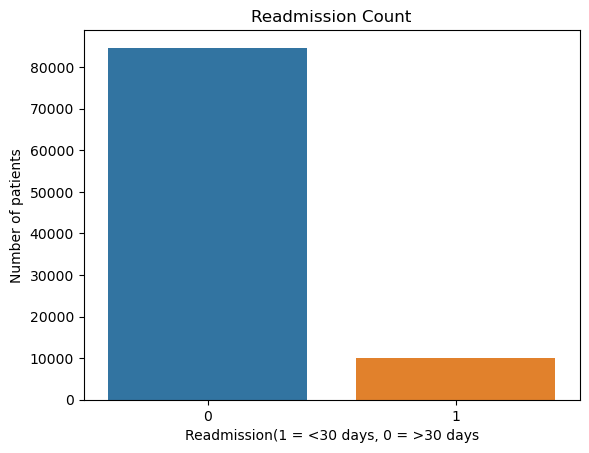

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data = df,x="readmitted")
plt.title("Readmission Count")
plt.xlabel("Readmission(1 = <30 days, 0 = >30 days")
plt.ylabel("Number of patients")
# plt.savefig("outputs/readmission_count.png")
plt.show()

In [24]:
# Check Correlation
corr = df.corr(numeric_only=True) # only numeric column
corr_target = corr["readmitted"].sort_values(ascending=False)

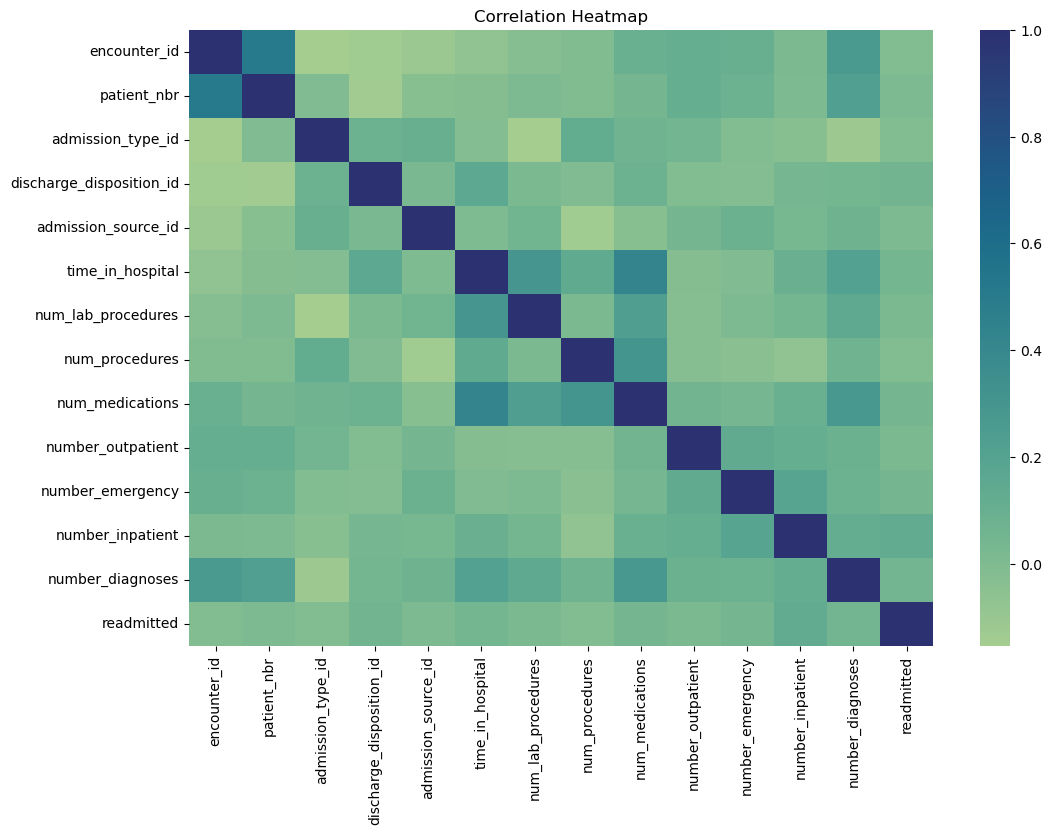

In [25]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='crest', annot=False)
plt.title("Correlation Heatmap")
# plt.savefig("outputs/correlation_heatmap.png")
plt.show()

In [26]:
print(f"Top features positively correlated with readmission:\n {corr_target.head(10)}")
print("*****"*10)
print(f"\nTop features negatively correlated with readmission:\n {corr_target.tail(10)}")

Top features positively correlated with readmission:
 readmitted                  1.000000
number_inpatient            0.130458
discharge_disposition_id    0.053349
number_diagnoses            0.049667
time_in_hospital            0.045490
number_emergency            0.042917
num_medications             0.042695
num_lab_procedures          0.019846
number_outpatient           0.018588
patient_nbr                 0.007442
Name: readmitted, dtype: float64
**************************************************

Top features negatively correlated with readmission:
 time_in_hospital       0.045490
number_emergency       0.042917
num_medications        0.042695
num_lab_procedures     0.019846
number_outpatient      0.018588
patient_nbr            0.007442
admission_source_id    0.005621
admission_type_id     -0.010398
num_procedures        -0.010496
encounter_id          -0.012384
Name: readmitted, dtype: float64


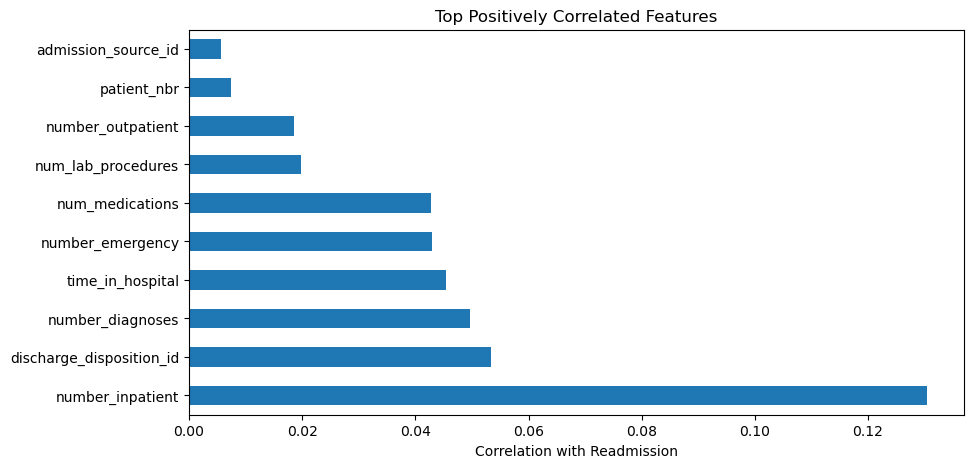

In [27]:
# Top 10 Features by Correlation
plt.figure(figsize=(10,5))
correlations = df.corr(numeric_only=True)['readmitted'].drop('readmitted').sort_values(ascending=False)
correlations[:10].plot(kind='barh')
plt.title("Top Positively Correlated Features")
plt.xlabel("Correlation with Readmission")
# plt.savefig("outputs/top10_positiveCorrelation.png")
plt.show()

### Time in hospital vs Readmission

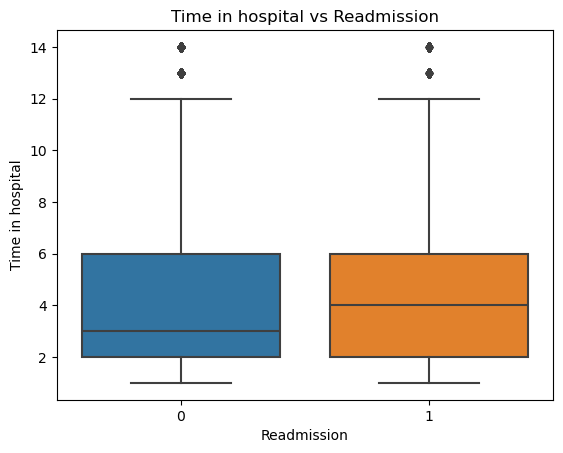

In [28]:
sns.boxplot(x="readmitted",y="time_in_hospital",data = df)
plt.title("Time in hospital vs Readmission")
plt.xlabel("Readmission")
plt.ylabel("Time in hospital")
# plt.savefig("outputs/time_in_hospitalVSreadmission.png")
plt.show() 

### Number of Medications

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


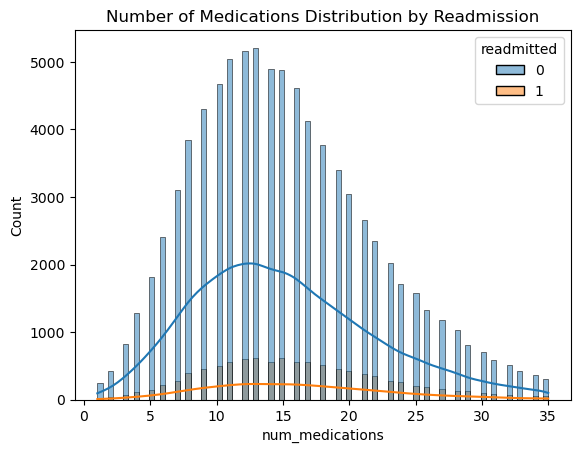

In [29]:
sns.histplot(data = df,x="num_medications",hue="readmitted",kde=True)
plt.title("Number of Medications Distribution by Readmission")
# plt.savefig("outputs/num_of_medications.png")
plt.show()

In [30]:
# Total Number of Medical Cases
df["total_visits"] = df["number_outpatient"] + df["number_emergency"] + df["number_inpatient"]

### Medication Count Grouping

In [31]:
df['medication_bins'] = pd.cut(df['num_medications'], bins=[0, 10, 20, 30, 100], labels=['Low', 'Medium', 'High', 'Very High'])

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


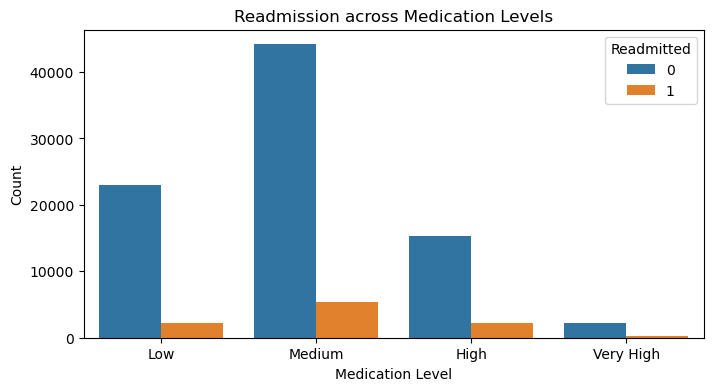

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='medication_bins', hue=df['readmitted'].astype(str))
plt.title("Readmission across Medication Levels")
plt.xlabel("Medication Level")
plt.ylabel("Count")
plt.legend(title="Readmitted")
# plt.savefig("outputs/medication_count.png")
plt.show()

### Hospital Stay Length Category

In [33]:
df["stay_length"] = pd.cut(df["time_in_hospital"], bins=[0, 3, 7, 14], labels=['Short', 'Medium', 'Long'])

C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\alito\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


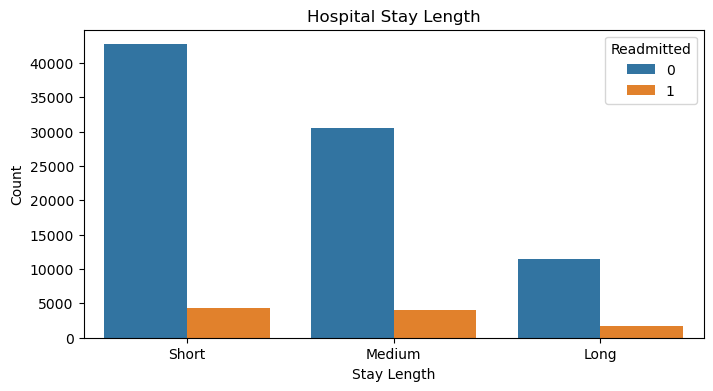

In [34]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='stay_length', hue=df['readmitted'].astype(str))
plt.title("Hospital Stay Length")
plt.xlabel("Stay Length")
plt.ylabel("Count")
plt.legend(title="Readmitted")
# plt.savefig("outputs/stay_length.png")
plt.show()

### High Risk Age Group

In [35]:
# Flag elderly patients
df['is_elderly'] = df['age'].apply(lambda x: 1 if x in ['[80-90)', '[90-100)'] else 0)

### Readmission Rate by Age Group

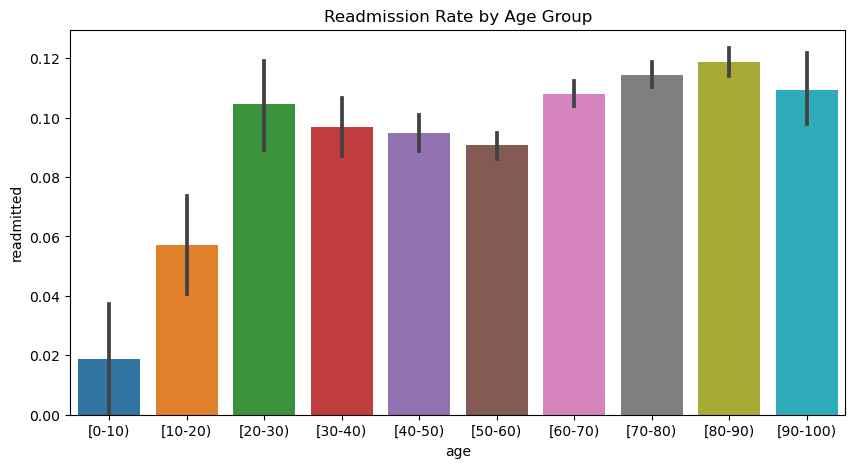

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='age', y='readmitted')
plt.title("Readmission Rate by Age Group")
# plt.savefig("outputs/readmission_age_count.png")
plt.show()

### Pie Chart of Readmission

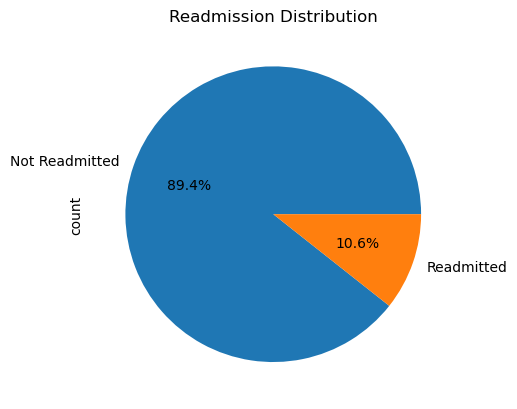

In [37]:
df['readmitted'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Not Readmitted', 'Readmitted'])
plt.title("Readmission Distribution")
# plt.savefig("outputs/readmission_piechart.png")
plt.show()

### Encode Categorical Variables

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
categorical_cols = df.select_dtypes(include="object").columns
le = LabelEncoder()

In [40]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94737 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   encounter_id              94737 non-null  int64   
 1   patient_nbr               94737 non-null  int64   
 2   race                      94737 non-null  int32   
 3   gender                    94737 non-null  int32   
 4   age                       94737 non-null  int32   
 5   admission_type_id         94737 non-null  int64   
 6   discharge_disposition_id  94737 non-null  int64   
 7   admission_source_id       94737 non-null  int64   
 8   time_in_hospital          94737 non-null  int64   
 9   payer_code                94737 non-null  int32   
 10  medical_specialty         94737 non-null  int32   
 11  num_lab_procedures        94737 non-null  int64   
 12  num_procedures            94737 non-null  int64   
 13  num_medications           94737 non-null  int64   

In [42]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,medication_bins,stay_length,is_elderly
0,2278392,8222157,2,0,0,6,25,1,1,0,...,0,0,0,1,0,0,0,Low,Short,0
1,149190,55629189,2,0,1,1,1,7,3,0,...,0,0,0,0,1,0,0,Medium,Short,0
2,64410,86047875,0,0,2,1,1,7,2,0,...,0,0,0,1,1,0,3,Medium,Short,0
3,500364,82442376,2,1,3,1,1,7,2,0,...,0,0,0,0,1,0,0,Medium,Short,0
4,16680,42519267,2,1,4,1,1,7,1,0,...,0,0,0,0,1,0,0,Low,Short,0


In [43]:
df.sample(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,total_visits,medication_bins,stay_length,is_elderly
24261,82345440,5207157,2,0,7,1,1,7,6,0,...,0,0,0,1,1,0,3,Medium,Medium,0
76666,231668460,29164752,2,0,5,1,1,7,1,6,...,0,0,0,1,0,0,0,Low,Short,0
76303,230182164,71587998,2,1,5,1,1,7,3,1,...,0,0,0,1,0,0,0,Low,Short,0
18765,67559916,22686138,2,1,5,2,1,1,4,0,...,0,0,0,1,1,0,2,Medium,Medium,0
72162,210615120,72125793,0,0,4,1,1,7,3,6,...,0,0,0,1,0,0,2,Low,Short,0
24095,81893556,47726658,2,0,7,1,1,7,3,0,...,0,0,0,1,0,0,0,High,Short,0
100067,420842924,97158519,2,1,6,1,1,7,3,7,...,0,0,0,1,1,0,0,Medium,Short,0
82635,257657220,43540884,2,1,8,1,3,7,2,7,...,0,0,0,1,1,1,1,Medium,Short,1
84368,265801104,44869734,0,0,3,1,1,7,3,12,...,0,0,0,0,1,0,0,Medium,Short,0
17955,65500434,10835865,2,0,7,1,18,7,6,0,...,0,0,0,1,1,0,0,High,Medium,0


# Modeling and Evaluation

In [44]:
x = df.drop(["encounter_id","patient_nbr","readmitted"],axis=1)
y = df["readmitted"]

In [45]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [50]:
non_numeric_cols = x_train.select_dtypes(include=['object', 'category']).columns
print(non_numeric_cols)

Index(['medication_bins', 'stay_length'], dtype='object')


In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

### Use SMOTE to balance classes

In [52]:
# !pip install -U scikit-learn imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=1)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

# XGBoost Classifier

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb = XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), use_label_encoder=False, eval_metric='logloss', random_state=10)

In [56]:
xgb.fit(x_train_res, y_train_res)

C:\Users\alito\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:01:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
y_pred_xgb = xgb.predict(x_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print("Classification Report:\n")
print(classification_report(y_test,y_pred_xgb))

Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.56      0.70      8466
           1       0.14      0.59      0.22      1008

    accuracy                           0.57      9474
   macro avg       0.53      0.57      0.46      9474
weighted avg       0.84      0.57      0.65      9474



### Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)],  # imbalance ratio
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

In [63]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1)

In [64]:
# from sklearn.model_selection import StratifiedKFold
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [65]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)

In [66]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\alito\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:08:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200],
                         'scale_pos_weight': [1, 8.396407317610755]},
             scoring='f1', verbose=2)

In [67]:
print("Best params:", grid_search.best_params_)

Best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 200, 'scale_pos_weight': 8.396407317610755}


In [68]:
best_model = grid_search.best_estimator_

In [69]:
y_pred_ht = best_model.predict(x_test)

In [70]:
print(classification_report(y_test, y_pred_ht))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78      8466
           1       0.17      0.56      0.26      1008

    accuracy                           0.67      9474
   macro avg       0.55      0.62      0.52      9474
weighted avg       0.85      0.67      0.73      9474



In [71]:
y_proba = best_model.predict_proba(x_test)[:, 1]

In [72]:
threshold = 0.6
y_pred_thresh = (y_proba >= threshold).astype(int)

In [73]:
print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[7339 1127]
 [ 694  314]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8466
           1       0.22      0.31      0.26      1008

    accuracy                           0.81      9474
   macro avg       0.57      0.59      0.57      9474
weighted avg       0.84      0.81      0.82      9474



# Plot Precision-Recall vs Threshold

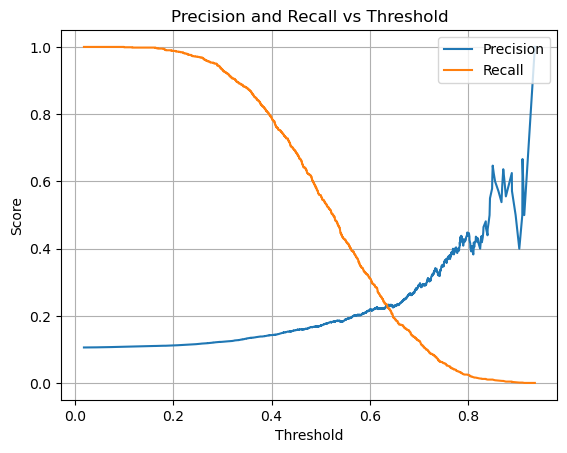

In [75]:
from sklearn.metrics import precision_recall_curve

prec, rec, thresh = precision_recall_curve(y_test, y_proba)

plt.plot(thresh, prec[:-1], label='Precision')
plt.plot(thresh, rec[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("outputs/precision_recall_threshold.png")
plt.show()